In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("CocaCola_Sales_Rawdata.xlsx",index_col=0,parse_dates=True)

# EDA

In [3]:
df

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


# Visualization

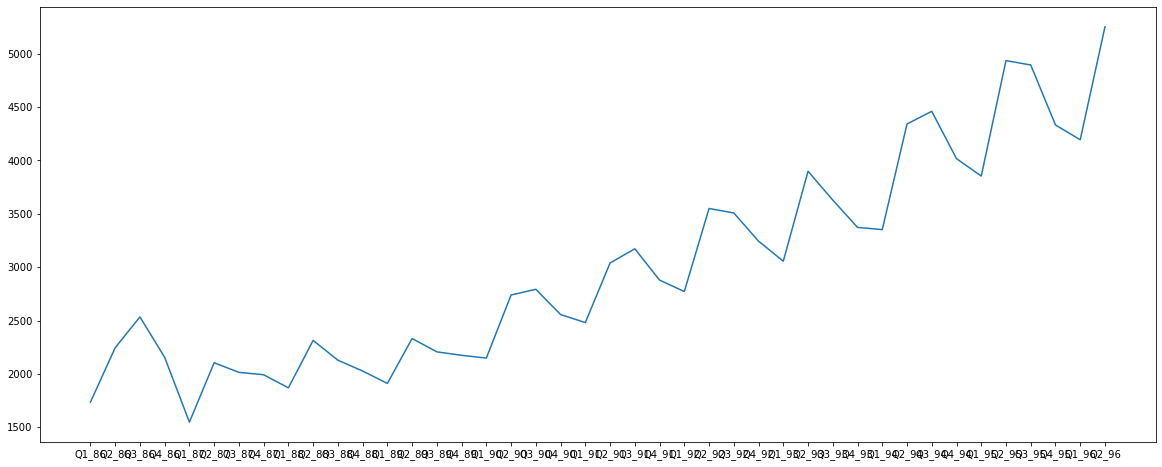

In [5]:
plt.figure(figsize = (20,8))
plt.plot(df)

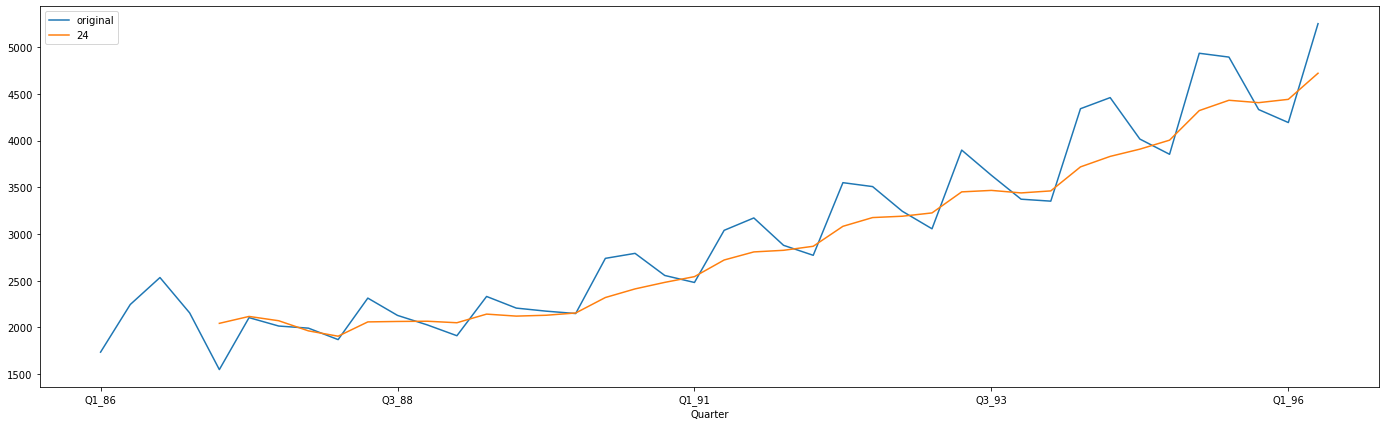

In [6]:
# Moving Average
plt.figure(figsize=(24,7))
df['Sales'].plot(label="original")
df['Sales'].rolling(5).mean().plot(label = str(24))
plt.legend(loc='best')

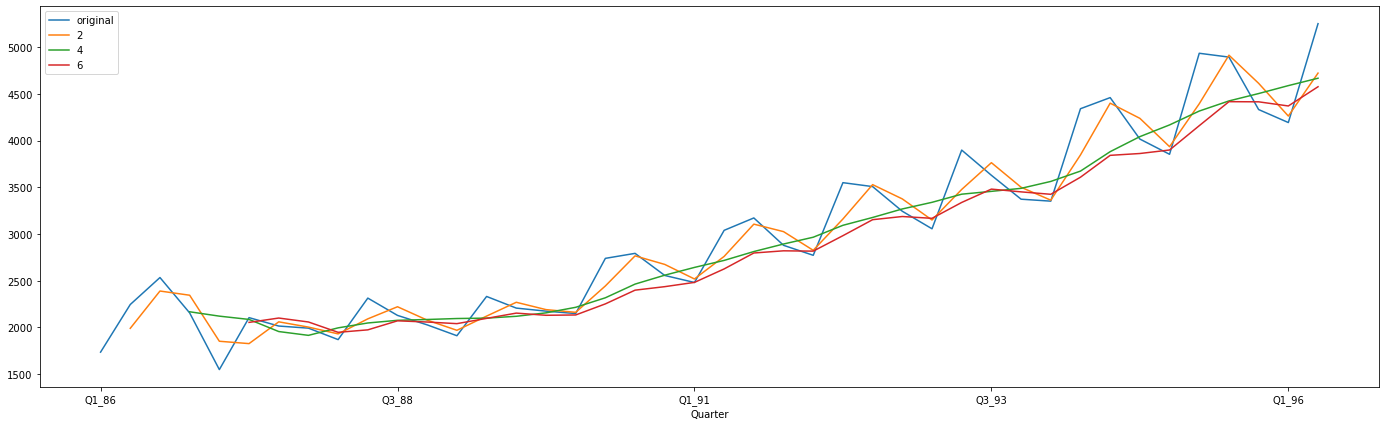

In [7]:
plt.figure(figsize=(24,7))
df['Sales'].plot(label="original")
for i in range(2,8,2):
    df['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

<AxesSubplot:ylabel='Density'>

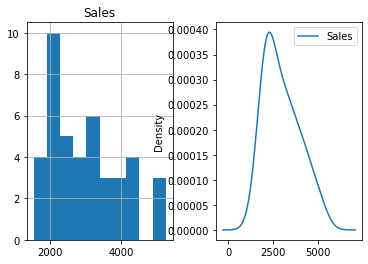

In [8]:
fig, axes = plt.subplots(1, 2)
df.hist(ax=axes[0])
df.plot(kind="kde",ax=axes[1])

In [9]:
series = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",
                  header=0,
                  index_col=0,
                  parse_dates=True,
                  squeeze=True)
series

C:\Users\cpakh\AppData\Local\Temp\ipykernel_6824\661129672.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",


Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Q4_94    4017.000000
Q1_95    3854.000000
Q2_95    4936.000000
Q3_95    4895.000000
Q4_95    4333.000000
Q1_96    4194.000000
Q2_96    5253.000000
Name: Sales, dtype: float64

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

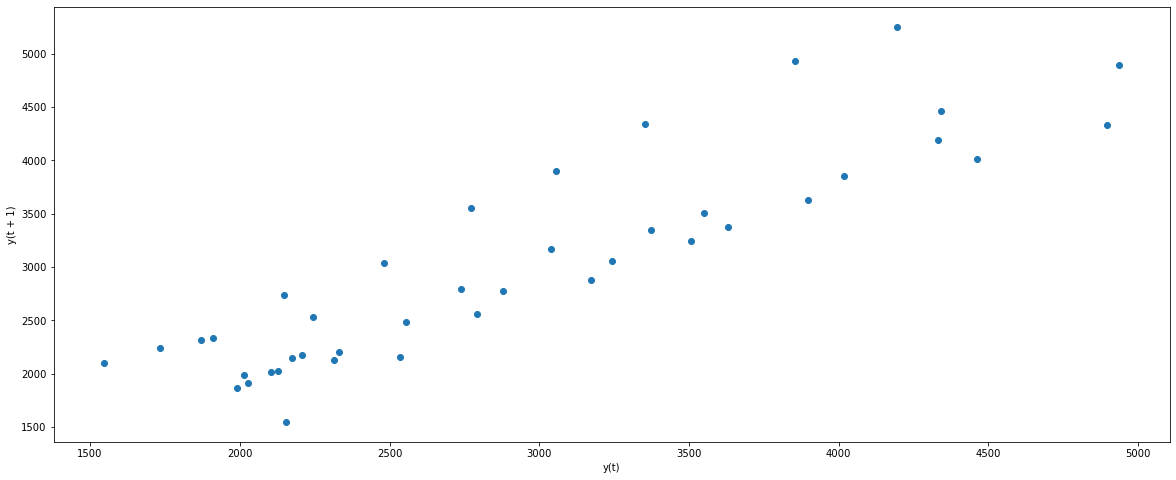

In [10]:
plt.figure(figsize=(20,8))
pd.plotting.lag_plot(series)

<Figure size 4320x1080 with 0 Axes>

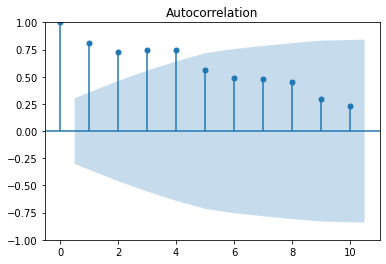

In [11]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (60,15))
plot_acf(series, lags=10)
plt.show()

# Preprocessing on Data

In [12]:
coca=pd.read_excel("CocaCola_Sales_Rawdata.xlsx",parse_dates=True)

In [13]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [14]:
coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [15]:
coca["t"]=np.arange(1,43)

In [16]:
coca["t_sqr"]=np.square(coca["t"])

In [17]:
coca

,Quarter,Sales,t,t_sqr
0,Q1_86,1734.827000,1,1
1,Q2_86,2244.960999,2,4
2,Q3_86,2533.804993,3,9
3,Q4_86,2154.962997,4,16
4,Q1_87,1547.818996,5,25
5,Q2_87,2104.411995,6,36
6,Q3_87,2014.362999,7,49
7,Q4_87,1991.746998,8,64
8,Q1_88,1869.049999,9,81
9,Q2_88,2313.631996,10,100


In [18]:
coca["Quar"] = coca['Quarter'].str[:2]

In [19]:
coca=pd.get_dummies(coca,columns=["Quar"])
coca["Quart"] = coca['Quarter'].str[:2]
coca["Year"]=coca["Quarter"].str[-2:]

In [20]:
coca.head()

,Quarter,Sales,t,t_sqr,Quar_Q1,Quar_Q2,Quar_Q3,Quar_Q4,Quart,Year
0,Q1_86,1734.827000,1,1,1,0,0,0,Q1,86
1,Q2_86,2244.960999,2,4,0,1,0,0,Q2,86
2,Q3_86,2533.804993,3,9,0,0,1,0,Q3,86
3,Q4_86,2154.962997,4,16,0,0,0,1,Q4,86
4,Q1_87,1547.818996,5,25,1,0,0,0,Q1,87


In [21]:
heatmap_y_month = pd.pivot_table(data = coca,
                                 values = "Sales",
                                 index = "Year",
                                 columns = "Quart",
                                 aggfunc = "mean",
                                 fill_value = 0)
heatmap_y_month

Quart,Q1,Q2,Q3,Q4
Year,,,,
86,1734.827000,2244.960999,2533.804993,2154.962997
87,1547.818996,2104.411995,2014.362999,1991.746998
88,1869.049999,2313.631996,2128.320000,2026.828999
89,1910.603996,2331.164993,2206.549995,2173.967995
90,2148.278000,2739.307999,2792.753998,2556.009995
91,2480.973999,3039.522995,3172.115997,2879.000999
92,2772.000000,3550.000000,3508.000000,3243.859993
93,3056.000000,3899.000000,3629.000000,3373.000000
94,3352.000000,4342.000000,4461.000000,4017.000000


<AxesSubplot:xlabel='Quart', ylabel='Year'>

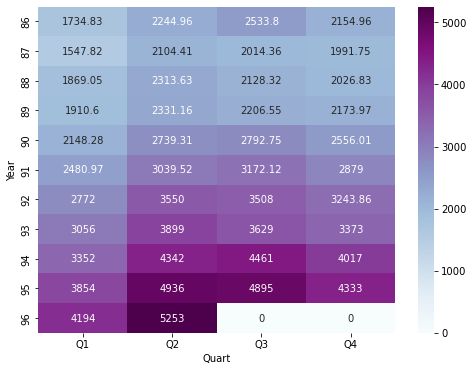

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_y_month,
            annot = True,
            fmt = "g",
            cmap = 'BuPu')

<AxesSubplot:xlabel='Year', ylabel='Sales'>

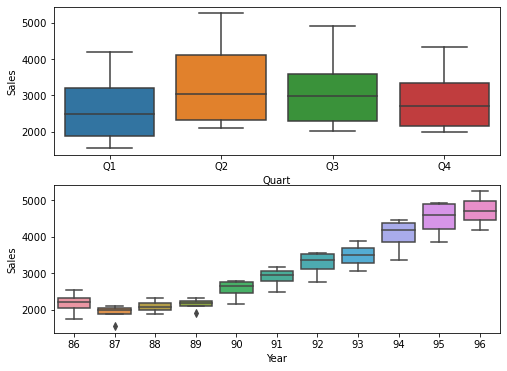

In [23]:
plt.figure(figsize=(8,6))

plt.subplot(211)
sns.boxplot(x="Quart",y="Sales",data=coca)

plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=coca)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

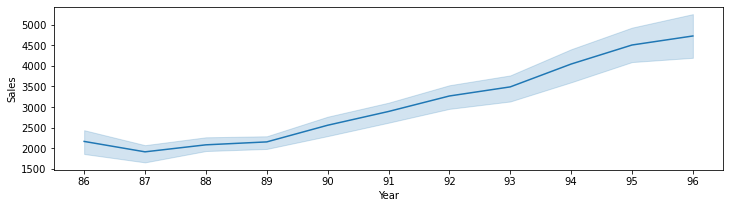

In [24]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year", y="Sales", data=coca)

# Spliting Data

In [25]:
coca.shape

(42, 10)

In [26]:
Train=coca.head(35)

In [27]:
Train.columns

Index(['Quarter', 'Sales', 't', 't_sqr', 'Quar_Q1', 'Quar_Q2', 'Quar_Q3',
       'Quar_Q4', 'Quart', 'Year'],
      dtype='object')

In [28]:
Test=coca.tail(7)

# Model Building

In [29]:
# Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales ~ t', data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

636.5072930351146

In [30]:
#Exponential
Exp = smf.ols('np.log(Sales) ~ t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

493.34864848421955

In [31]:
#Quadratic 
Quad = smf.ols('Sales ~ t + t_sqr',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sqr"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

511.8117319417333

In [32]:
#Additive seasonality 
add_sea = smf.ols('Sales~Quar_Q1+Quar_Q2+Quar_Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1861.8704164251742

In [33]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Sales~t+t_sqr+Quar_Q1+Quar_Q2+Quar_Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

309.464139516389

In [34]:
##Multiplicative Seasonality
Mul_sea = smf.ols('np.log(Sales)~Quar_Q1+Quar_Q2+Quar_Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1938.9332351966125

In [35]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('np.log(Sales)~t+Quar_Q1+Quar_Q2+Quar_Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

339.18746669952503

In [36]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('np.log(Sales)~t+Quar_Q1+Quar_Q2+Quar_Q3',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

4515.822756171213

In [37]:
#Compare the results 
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,309.464140
6,rmse_Mult_add_sea,339.187467
1,rmse_Exp,493.348648
2,rmse_Quad,511.811732
0,rmse_linear,636.507293
3,rmse_add_sea,1861.870416
5,rmse_Mult_sea,1938.933235


<AxesSubplot:xlabel='RMSE_Values', ylabel='MODEL'>

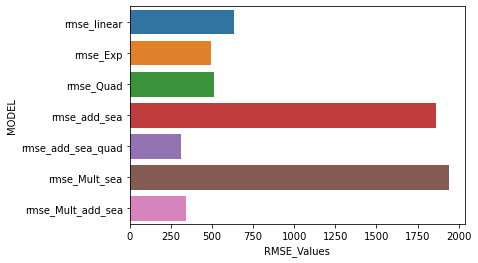

In [38]:
sns.barplot(data=table_rmse,x="RMSE_Values",y="MODEL", orient = 'h')

In [39]:
# Hence Additive Seasonality Quadratic  has lowest RMSE
# Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Sales~t+t_sqr+Quar_Q1+Quar_Q2+Quar_Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test))
pred_add_sea_quad

35    4197.333511
36    4120.453583
37    4840.142044
38    4914.214728
39    4795.942579
40    4736.501477
41    5473.628762
dtype: float64

In [40]:
predict_data=pd.DataFrame()

In [41]:
predict_data["forecasted_Sales"] = pd.Series(pred_add_sea_quad)
new_var = pd.concat([Train,predict_data])

In [42]:
predict_data

,forecasted_Sales
35,4197.333511
36,4120.453583
37,4840.142044
38,4914.214728
39,4795.942579
40,4736.501477
41,5473.628762


In [43]:
len(Train),len(predict_data)

(35, 7)

<AxesSubplot:>

<Figure size 1440x360 with 0 Axes>

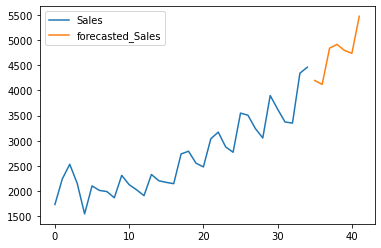

In [44]:
plt.figure(figsize = (20,5))
new_var[['Sales','forecasted_Sales']].reset_index(drop=True).plot()

# Data Driven Models

In [45]:

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # Single Exponential Smoothing
from statsmodels.tsa.holtwinters import Holt # Holts (Double) Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing #Holt Winter's (Triple) Exponential Smoothing 

### Time series decomposition plot

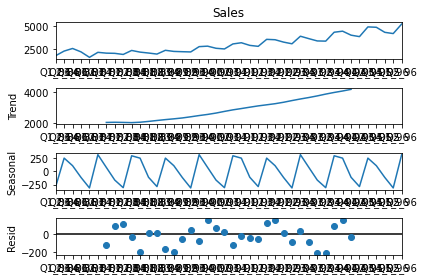

In [46]:
decompose_ts_add = seasonal_decompose(df["Sales"], period = 12)
decompose_ts_add.plot()
plt.show()

### ACF plots and PACF plots

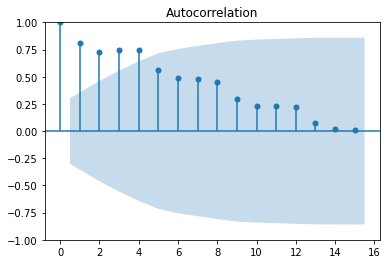

In [47]:
tsa_plots.plot_acf(df["Sales"],lags=15)
plt.show()

E:\Anaconda\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


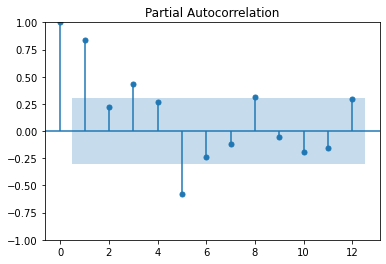

In [48]:
tsa_plots.plot_pacf(df["Sales"],lags=12)
plt.show()

### Evaluation Metric MAPE

In [49]:
def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method


In [50]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level = 0.9) # alpha = 0.9
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_ses, Test['Sales'])

9.837468050874895

### Holt method 

In [51]:
# Holt method
# aplha = 0.8, beta = 0.2
hw_model = Holt(Train["Sales"]).fit(smoothing_level = 0.8, smoothing_slope = 0.2)
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hw, Test['Sales'])

C:\Users\cpakh\AppData\Local\Temp\ipykernel_6824\395887586.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level = 0.8, smoothing_slope = 0.2)


15.891434465798794

### Holts winter exponential smoothing with additive seasonality and additive trend


In [52]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"], seasonal="add", trend="add", seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

5.308475130916448

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [53]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"], seasonal="mul", trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

4.688998255188624

## Final Model by combining train and test

In [54]:
hwe_model_mul_add = ExponentialSmoothing(coca["Sales"], seasonal="mul", trend="add",seasonal_periods=12).fit() 
#Forecasting for next 10 time periods
x=hwe_model_mul_add.forecast(20)

In [55]:
final_predict_data=pd.DataFrame()
final_predict_data["forecasted_Sales"] = pd.Series(x)
new = pd.concat([coca,final_predict_data])

<AxesSubplot:>

<Figure size 1440x360 with 0 Axes>

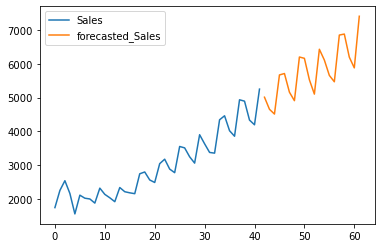

In [56]:
plt.figure(figsize = (20,5))
new[['Sales','forecasted_Sales']].reset_index(drop=True).plot()